<a href="https://colab.research.google.com/github/baysquire/Linear-Regression-with-Pytorch/blob/master/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparing to build the first Linear model

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# check the torch version
torch.__version__

# setup GPU device 
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device

'cpu'

In [ ]:
###

### Data Generation

In [ ]:
# 
weight = 0.7
bias = 0.3

#
start = 0
end = 10
step = 0.01

# Generate X numbers
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [ ]:
X[:10]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [ ]:
y[:10]

tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])

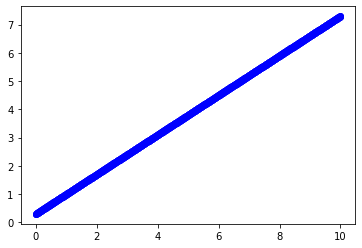

In [ ]:
plt.scatter(X,y, cmap="RdBuYl", c="b")


### Training and Testing Splitting

In [ ]:
# import train_test_split from sklearn module
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Create a new train/test split
train_split = int(len(X) * 0.8)
X_train, y_train  = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
y_test[:8]

tensor([[5.9000],
        [5.9070],
        [5.9140],
        [5.9210],
        [5.9280],
        [5.9350],
        [5.9420],
        [5.9490]])

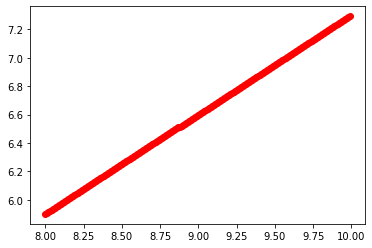

In [ ]:
plt.scatter(X_test,y_test, c="r")
plt.show()

### Create a function mainly for prediction visualization

In [ ]:
# function for visualization
def linear_prediction(train_data = X_train,
                      train_label = y_train,
                      test_data = X_test,
                      test_label = y_test,
                      predictions = None):
  # setup the canvas
  plt.figure(figsize=(12,8))

  # Train dataset plotting
  plt.scatter(train_data, train_label, c="b", s=4, label="Training")

  # Test dataset plotting
  plt.scatter(test_data, test_label, c="r", s=4, label="Testing")

  # Condition for prediction
  if predictions is not None:
    # prediction plotting
    plt.scatter(test_data, predictions, c="g", s=4, label="Predicting")

  plt.legend(prop={"size": 14})
  plt.title("Linear Model")
  plt.xlabel("X values")
  plt.ylabel("y values")
  # plt.show()



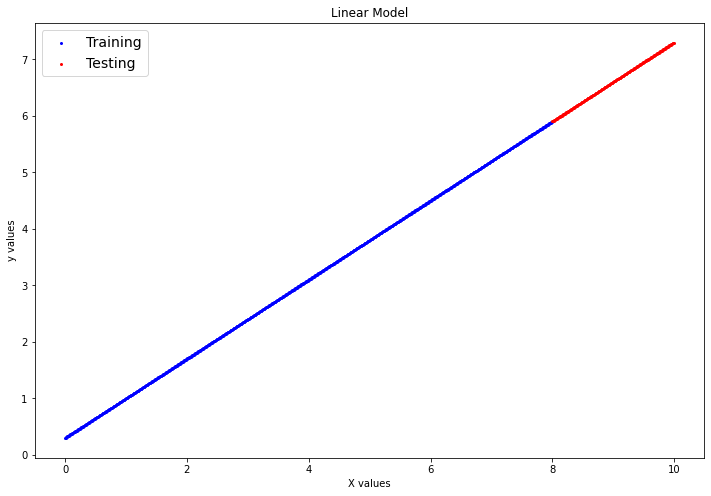

In [ ]:
linear_prediction()

### Build our Linear Model

In [ ]:
# Create a class for the model and subclass the nn.Module class
class FirstLinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float32))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float32))
  # Forward Propagation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias



In [ ]:
# Create the instance of the model
model_1 = FirstLinearModel()

In [ ]:
list(model_1.parameters())

[Parameter containing:
 tensor([-2.3873], requires_grad=True), Parameter containing:
 tensor([0.8664], requires_grad=True)]

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([-2.3873])), ('bias', tensor([0.8664]))])

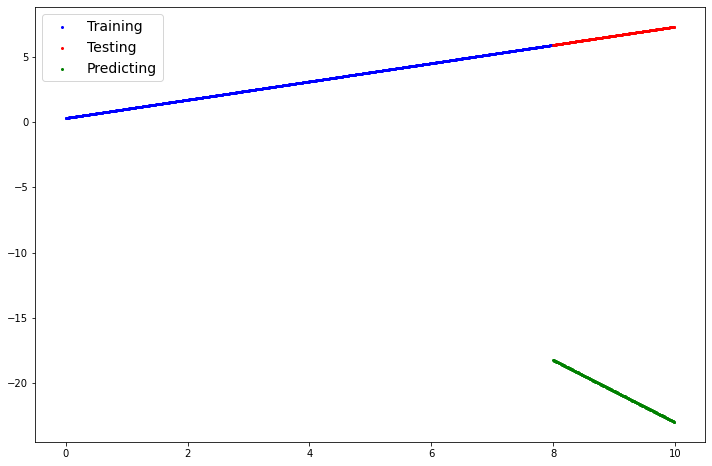

In [ ]:
# Set manuel seed
# torch.manual_seed(42)

# Check if the untrained model could predict well
with torch.inference_mode():
  y_preds = model_1(X_test)
# y_pred = y_preds.numpy()

# visualize the prediction
linear_prediction(predictions=y_preds)


In [ ]:
y_test.shape

torch.Size([200, 1])

### Create loss function, optimizer and accuracy 

In [ ]:
# loss function
loss_func = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                      lr=0.1)


### Create the Training and Testing LOOPs

In [ ]:
# set manual seed
# torch.manual_seed(42)

# set epochs
epochs = 200

# track different values
epoch_count=[]
train_loss=[]
test_loss=[]

# Start the Loop
for epoch in range(epochs):
  # Training Loop
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss_train = loss_func(y_pred, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Backward Propagation
  loss_train.backward()

  # 5. Optimize step
  optimizer.step()

  # Testing Loop
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    # Calculate the loss
    loss_test = loss_func(test_pred, y_test)
  
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss.append(loss_train)
    test_loss.append(loss_test)
    # print(f"epoch: {epoch}")
    print(f"epochs: {epoch} | train loss: {loss_train} | test loss: {loss_test}")
    print(f"{model_1.state_dict()}")






epochs: 0 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 10 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 20 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 30 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 40 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 50 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight', tensor([0.2997])), ('bias', tensor([0.2100]))])
epochs: 60 | train loss: 0.006857403554022312 | test loss: 3.6905734539031982
OrderedDict([('weight',

In [ ]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.6992])), ('bias', tensor([0.3100]))])

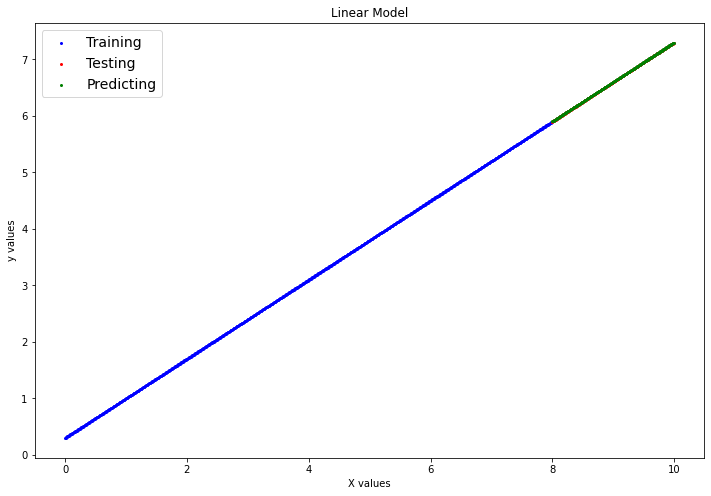

In [ ]:
linear_prediction(predictions=test_pred)

#### Great! our model performed well.

In [ ]:
import numpy as np
A = np.array(loss_train.detach().numpy())
B = np.array(loss_test.detach().numpy())
B

# plt.plot(epoch_count, A, label="Training loss")
# plt.plot(epoch_count, B, label="Testing loss")


array(0.0029287, dtype=float32)

In [ ]:
plt.plot()

In [ ]:
torch.tensor(loss_train)

<ipython-input-177-f8fbe5b627cb>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(loss_train)


tensor(1.6891)